In [1]:
import os
# ^^^ pyforest auto-imports - don't write above this line
import pyforest
import pandas as pd
from DataBuckets import Buckets
from collections import Counter

<IPython.core.display.Javascript object>

In [2]:
b = Buckets()
df3, df2 = b.main()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/AsgerSturisTang/OneDrive - Danmarks Tekniske Universitet/DTU/6. Semester/Bachelor2021/DataPrep/data/createdDat/centeredData.csv'

In [14]:
b.df.loc[[66915, 66917, 66922, 66926, 66930, 66931]]

,Unnamed: 0,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,ID,Pairlocation,Label,CenterLon,CenterLat
66915,66915,PALO ALTO CA / CAMBRIDGE #2,0024B100000213B7,City of Palo Alto,2016-06-01 06:46:00,PDT,2016-06-01 09:02:00,PDT,136.300000,135.683333,...,0.0,Plug Out at Vehicle,1215,95120.0,524259.0,22,37.426x-122.146,0,-122.146,37.426045
66917,66917,PALO ALTO CA / CAMBRIDGE #1,0024B10000021329,City of Palo Alto,2016-06-01 07:00:00,PDT,2016-06-01 07:46:00,PDT,46.400000,43.700000,...,0.0,Plug Out at Vehicle,1199,80525.0,203603.0,20,37.426x-122.146,0,-122.146,37.426045
66922,66922,PALO ALTO CA / CAMBRIDGE #2,0024B100000213B7,City of Palo Alto,2016-06-01 07:16:00,PDT,2016-06-01 11:10:00,PDT,234.033333,233.783333,...,0.0,Plug Out at Vehicle,1216,94062.0,408035.0,22,37.426x-122.146,0,-122.146,37.426045
66926,66926,PALO ALTO CA / CAMBRIDGE #1,0024B10000021329,City of Palo Alto,2016-06-01 07:33:00,PDT,2016-06-01 08:39:00,PDT,65.866667,65.433333,...,0.0,Plug Out at Vehicle,1200,94404.0,551261.0,20,37.426x-122.146,0,-122.146,37.426045
66930,66930,PALO ALTO CA / CAMBRIDGE #1,0024B10000021329,City of Palo Alto,2016-06-01 07:47:00,PDT,2016-06-01 07:48:00,PDT,1.283333,0.783333,...,0.0,Plug Out at Vehicle,1201,94010.0,212081.0,20,37.426x-122.146,0,-122.146,37.426045
66931,66931,PALO ALTO CA / CAMBRIDGE #1,0024B10000021329,City of Palo Alto,2016-06-01 07:49:00,PDT,2016-06-01 11:07:00,PDT,198.733333,196.433333,...,0.0,Plug Out at Vehicle,1202,94010.0,212081.0,20,37.426x-122.146,0,-122.146,37.426045


In [9]:
df3.head(20).loc[2]

Start Date                                                 2016-06-01 06:00:00
Label                                                                        0
Original Duration            [135.68333333333334, 43.7, 233.78333333333333,...
Original Start               [2016-06-01 06:46:00, 2016-06-01 07:00:00, 201...
Original Index                      [66915, 66917, 66922, 66926, 66930, 66931]
Original Port Type           [Level 2, Level 2, Level 2, Level 2, Level 2, ...
Charging Time (hh:mm:ss)                                                201.21
Energy (kWh)                                                           12.2598
Total Duration (hh:mm:ss)                                              205.104
Port Number                                                                 10
Name: 2, dtype: object

In [23]:
def countLevels(s):
    counts = Counter(s["Original Port Type"])
    s["Level 1"] = counts["Level 1"]
    s["Level 2"] = counts["Level 2"]

    return s

In [18]:
df3 = df3.drop(columns=["Original Duration", "Original Start", "Original Index"])


KeyError: "['Original Duration' 'Original Start' 'Original Index'] not found in axis"

In [26]:
df3 = df3.apply(countLevels, axis=1)

In [51]:
df3.head()

,Start Date,Label,Original Port Type,Charging Time (hh:mm:ss),Energy (kWh),Total Duration (hh:mm:ss),Port Number,Level 1,Level 2
0,2016-06-01 00:00:00,3,[Level 2],75.266667,4.559885,499.150000,2,0,1
1,2016-06-01 04:00:00,4,[Level 2],47.089015,2.711091,56.358460,1,0,1
2,2016-06-01 06:00:00,0,"[Level 2, Level 2, Level 2, Level 2, Level 2, ...",201.210147,12.259771,205.104463,10,0,6
3,2016-06-01 06:00:00,1,"[Level 2, Level 2]",224.549888,11.732555,236.535873,3,0,2
4,2016-06-01 06:00:00,2,"[Level 2, Level 2, Level 2]",119.388081,11.179312,123.470304,3,0,3


In [48]:
testdf = df[df.Label == 0]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

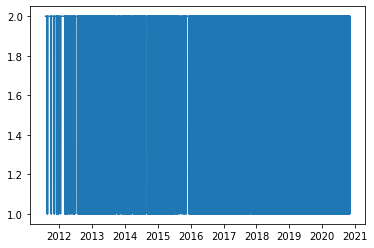

In [40]:
plt.plot(testdf["Start Date"], testdf["Port Number"])
plt.show()

In [42]:
testdf["Start Date"].min()

Timestamp('2011-07-29 20:17:00')

In [43]:
testdf["Start Date"].max()

Timestamp('2020-11-04 04:54:00')

In [49]:
testdf.head()

,Unnamed: 0,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,ID,Pairlocation,Label,CenterLon,CenterLat
50210,50210,PALO ALTO CA / CAMBRIDGE #1,0024B10000021329,City of Palo Alto,2016-01-14 11:19:00,PST,2016-01-14 12:09:00,PST,1900-01-01 00:49:39,1900-01-01 00:48:19,...,0.0,Plug Out at Vehicle,16,94538.0,321749.0,20,37.427x-122.146,0,-122.146,37.426045
50228,50228,PALO ALTO CA / CAMBRIDGE #2,0024B100000213B7,City of Palo Alto,2016-01-14 13:45:00,PST,2016-01-14 14:01:00,PST,1900-01-01 00:16:53,1900-01-01 00:15:39,...,0.0,Plug Out at Vehicle,11,94306.0,199071.0,22,37.427x-122.146,0,-122.146,37.426045
50258,50258,PALO ALTO CA / CAMBRIDGE #1,0024B10000021329,City of Palo Alto,2016-01-14 17:45:00,PST,2016-01-14 19:50:00,PST,1900-01-01 02:04:36,1900-01-01 02:02:49,...,0.0,Plug Out at Vehicle,18,94568.0,436329.0,20,37.427x-122.146,0,-122.146,37.426045
50273,50273,PALO ALTO CA / CAMBRIDGE #1,0024B10000021329,City of Palo Alto,2016-01-14 20:02:00,PST,2016-01-14 20:22:00,PST,1900-01-01 00:20:18,1900-01-01 00:20:04,...,0.0,CPS Server,19,94306.0,256741.0,20,37.427x-122.146,0,-122.146,37.426045
50274,50274,PALO ALTO CA / CAMBRIDGE #2,0024B100000213B7,City of Palo Alto,2016-01-14 20:03:00,PST,2016-01-14 23:34:00,PST,1900-01-01 03:30:32,1900-01-01 02:48:44,...,0.0,Customer,13,94306.0,256741.0,22,37.427x-122.146,0,-122.146,37.426045


In [63]:
b.df

,Unnamed: 0,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,ID,Pairlocation,Label,CenterLon,CenterLat
66908,66908,PALO ALTO CA / RINCONADA LIB 1,000D6F00009DCC2B,City of Palo Alto,2016-06-01 00:23:00,PDT,2016-06-01 08:42:00,PDT,499.150000,75.266667,...,0.0,Plug Out at Vehicle,2064,94539.0,365219.0,13,37.445x-122.139,3,-122.139000,37.445000
66909,66909,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-06-01 05:13:00,PDT,2016-06-01 07:52:00,PDT,158.283333,132.250000,...,0.0,Plug Out at Vehicle,2444,94303.0,290219.0,17,37.448x-122.158,4,-122.158000,37.448135
66910,66910,PALO ALTO CA / HAMILTON #2,0024B10000021331,City of Palo Alto,2016-06-01 06:04:00,PDT,2016-06-01 08:52:00,PDT,167.750000,153.483333,...,0.0,Plug Out at Vehicle,1425,95117.0,175737.0,19,37.444x-122.16,1,-122.160000,37.444473
66911,66911,PALO ALTO CA / HAMILTON #2,0024B10000021331,City of Palo Alto,2016-06-01 06:12:00,PDT,2016-06-01 08:51:00,PDT,158.966667,157.266667,...,0.0,Plug Out at Vehicle,1426,94539.0,126575.0,19,37.444x-122.16,1,-122.160000,37.444473
66912,66912,PALO ALTO CA / TED THOMPSON #1,0024B10000021323,City of Palo Alto,2016-06-01 06:18:00,PDT,2016-06-01 07:11:00,PDT,53.300000,52.550000,...,0.0,Plug Out at Vehicle,985,95062.0,288717.0,23,37.428x-122.144,7,-122.143998,37.428413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70543,70543,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2016-06-30 21:38:00,PDT,2016-06-30 22:28:00,PDT,49.766667,49.466667,...,0.0,Plug Out at Vehicle,10081,94303.0,154551.0,0,37.444x-122.16,1,-122.160000,37.444473
70544,70544,PALO ALTO CA / HAMILTON #2,0024B10000021331,City of Palo Alto,2016-06-30 22:12:00,PDT,2016-07-01 07:23:00,PDT,550.750000,137.400000,...,0.0,Plug Out at Vehicle,1751,94301.0,517297.0,19,37.444x-122.16,1,-122.160000,37.444473
70545,70545,PALO ALTO CA / WEBSTER #3,0024B100000213D1,City of Palo Alto,2016-06-30 22:13:00,PDT,2016-07-01 07:12:00,PDT,539.583333,112.650000,...,0.0,Plug Out at Vehicle,1399,94952.0,308479.0,21,37.449x-122.158,4,-122.158000,37.448135
70546,70546,PALO ALTO CA / HIGH #4,000D6F00015B9402,City of Palo Alto,2016-06-30 22:37:00,PDT,2016-07-01 07:31:00,PDT,533.916667,158.083333,...,0.0,Plug Out at Vehicle,425,94301.0,166781.0,25,37.444x-122.163,5,-122.163000,37.443405


In [62]:
df.columns


Index(['Unnamed: 0', 'Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'Address 1', 'City', 'State/Province',
       'Postal Code', 'Country', 'Latitude', 'Longitude', 'Currency', 'Fee',
       'Ended By', 'Plug In Event Id', 'Driver Postal Code', 'User ID', 'ID',
       'Pairlocation', 'Label', 'CenterLon', 'CenterLat'],
      dtype='object')

In [60]:
df.head()

,Unnamed: 0,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,ID,Pairlocation,Label,CenterLon,CenterLat
0,0,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,2011-07-29 23:20:00,PDT,1900-01-01 03:03:32,1900-01-01 01:54:03,...,0.0,Plug Out at Vehicle,3,95124.0,3284.0,0,37.445x-122.16,1,-122.16,37.444473
1,1,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-30 00:00:00,PDT,2011-07-30 00:02:00,PDT,1900-01-01 00:02:06,1900-01-01 00:01:54,...,0.0,Customer,4,94301.0,4169.0,0,37.445x-122.16,1,-122.16,37.444473
2,2,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-30 08:16:00,PDT,2011-07-30 12:34:00,PDT,1900-01-01 04:17:32,1900-01-01 04:17:28,...,0.0,Plug Out at Vehicle,5,94301.0,4169.0,0,37.445x-122.16,1,-122.16,37.444473
3,3,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-30 14:51:00,PDT,2011-07-30 16:55:00,PDT,1900-01-01 02:03:24,1900-01-01 02:02:58,...,0.0,Customer,6,94302.0,2545.0,0,37.445x-122.16,1,-122.16,37.444473
4,4,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-30 18:51:00,PDT,2011-07-30 20:03:00,PDT,1900-01-01 01:11:24,1900-01-01 00:43:54,...,0.0,Plug Out at Vehicle,7,94043.0,3765.0,0,37.445x-122.16,1,-122.16,37.444473


In [64]:
b.df

,Unnamed: 0,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,ID,Pairlocation,Label,CenterLon,CenterLat
66908,66908,PALO ALTO CA / RINCONADA LIB 1,000D6F00009DCC2B,City of Palo Alto,2016-06-01 00:23:00,PDT,2016-06-01 08:42:00,PDT,499.150000,75.266667,...,0.0,Plug Out at Vehicle,2064,94539.0,365219.0,13,37.445x-122.139,3,-122.139000,37.445000
66909,66909,PALO ALTO CA / WEBSTER #2,0024B100000207FA,City of Palo Alto,2016-06-01 05:13:00,PDT,2016-06-01 07:52:00,PDT,158.283333,132.250000,...,0.0,Plug Out at Vehicle,2444,94303.0,290219.0,17,37.448x-122.158,4,-122.158000,37.448135
66910,66910,PALO ALTO CA / HAMILTON #2,0024B10000021331,City of Palo Alto,2016-06-01 06:04:00,PDT,2016-06-01 08:52:00,PDT,167.750000,153.483333,...,0.0,Plug Out at Vehicle,1425,95117.0,175737.0,19,37.444x-122.16,1,-122.160000,37.444473
66911,66911,PALO ALTO CA / HAMILTON #2,0024B10000021331,City of Palo Alto,2016-06-01 06:12:00,PDT,2016-06-01 08:51:00,PDT,158.966667,157.266667,...,0.0,Plug Out at Vehicle,1426,94539.0,126575.0,19,37.444x-122.16,1,-122.160000,37.444473
66912,66912,PALO ALTO CA / TED THOMPSON #1,0024B10000021323,City of Palo Alto,2016-06-01 06:18:00,PDT,2016-06-01 07:11:00,PDT,53.300000,52.550000,...,0.0,Plug Out at Vehicle,985,95062.0,288717.0,23,37.428x-122.144,7,-122.143998,37.428413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70543,70543,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2016-06-30 21:38:00,PDT,2016-06-30 22:28:00,PDT,49.766667,49.466667,...,0.0,Plug Out at Vehicle,10081,94303.0,154551.0,0,37.444x-122.16,1,-122.160000,37.444473
70544,70544,PALO ALTO CA / HAMILTON #2,0024B10000021331,City of Palo Alto,2016-06-30 22:12:00,PDT,2016-07-01 07:23:00,PDT,550.750000,137.400000,...,0.0,Plug Out at Vehicle,1751,94301.0,517297.0,19,37.444x-122.16,1,-122.160000,37.444473
70545,70545,PALO ALTO CA / WEBSTER #3,0024B100000213D1,City of Palo Alto,2016-06-30 22:13:00,PDT,2016-07-01 07:12:00,PDT,539.583333,112.650000,...,0.0,Plug Out at Vehicle,1399,94952.0,308479.0,21,37.449x-122.158,4,-122.158000,37.448135
70546,70546,PALO ALTO CA / HIGH #4,000D6F00015B9402,City of Palo Alto,2016-06-30 22:37:00,PDT,2016-07-01 07:31:00,PDT,533.916667,158.083333,...,0.0,Plug Out at Vehicle,425,94301.0,166781.0,25,37.444x-122.163,5,-122.163000,37.443405


In [ ]:
def standardizeConsumption(s):
    s["NormConsumption"] = s["Energy (kWh)"]/s["Port Number"]
    return s

In [65]:
df3.head()

,Start Date,Label,Original Port Type,Charging Time (hh:mm:ss),Energy (kWh),Total Duration (hh:mm:ss),Port Number,Level 1,Level 2
0,2016-06-01 00:00:00,3,[Level 2],75.266667,4.559885,499.150000,2,0,1
1,2016-06-01 04:00:00,4,[Level 2],47.089015,2.711091,56.358460,1,0,1
2,2016-06-01 06:00:00,0,"[Level 2, Level 2, Level 2, Level 2, Level 2, ...",201.210147,12.259771,205.104463,10,0,6
3,2016-06-01 06:00:00,1,"[Level 2, Level 2]",224.549888,11.732555,236.535873,3,0,2
4,2016-06-01 06:00:00,2,"[Level 2, Level 2, Level 2]",119.388081,11.179312,123.470304,3,0,3
